In [ ]:
#CNN 특징
# 1. 합성곱층 : 이미지에 합성곱을 하여 이미지의 특징을 추출  필터를이용하여 특징의 검출이 이뤄 진다.
#               import torchnn as nn  ...... nn.Conv2d(3,6,5) # 합성곱층(입력 채널 수, 필터 수, 파일크기)
# 2. 풀링층   : 합성곱층 뒤에 주로 배치, 이미지를 축소한다.
#               import torchnn as nn ....... nn.MaxPool2d(2,2) # 풀링층: (영역의 크기, 영역의 간격)
# 3. 패딩     : 입력 이미지를 둘러 사듯이 픽셀을 배치하는 테크닉
#               이미지의 크기가 커진다. 합성곱 및 풀링에 의해 이미지가 작아지므로 이러한 층을 몇 번 거듭하면
#               마지막에 1x1 가 되므로 패딩을 실시해 너무 작아지는 이미지를 방지 할 수 있다.
# 4. 스트라이드 : 합성곱에서 필터가 이동하는 간격을 스트라이드라고 한다.
#                스트라이드가 큰 경우, 필터의 이동 거리가 크기 떄문에 출력 이미지의 크기는 작아진다.
# 5. 데이터 확장 : 훈련데이터가 적으면 실용적인 모델이 되지 않는다. 학습에 필요한 데이터를 많이 모을려면 품이 많이 든다.
#                  이러한 문제 대책중 하나가 데이터 확장이다.
#                  회전, 확대/축소, 상하좌우로 이동, 상하좌우로 반전, 일부 소거
# 6. 드롭아웃 : 출력층 이외의 뉴런을 일정 확률로 무작의 소거 하는 테크닉 모델의 범화 성능 향상에 큰 효과가 있다.
#               드롭아웃을 도입한 기계학습은 형상이 다른 작은 네트워크의 조합을 이용한 학습이므로
#               비교적 쉬우면서 범화 성능 향상에 큰 효과가 있다.
#               import torchnn as nn ....... nn.Dropout(p=0.5) # 드롭아웃: (p = 드롭아웃률)

In [ ]:
# CNN 구현
# DATALOAD의 설정
# 데이터 확장을 위해 회전과 크기 조절 및 좌우 반전을 실시한다.
# 효율적인 학습이 되도록 입력의 평균 값을 0, 표준 편차를 1로 한다.

#1. Dataloder 설정
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

cifar10_classes = ["airplane", "automobile","bird", "cat", "deer", "dog", "frog","horse", "ship", "truck"]

affine = transforms.RandomAffine((-30, 30), scale=(0.8, 1.2)) # 회전과 크기 조절
flip = transforms.RandomHorizontalFlip(p=0.5)                 # 좌우 반전
normalize = transforms.Normalize((0.0,0.0,0.0), (1.0,1.0,1.0)) # 평균 값을 0, 표준편차를 1로
to_tensor = transforms.ToTensor()
#erase =   # ←여기에 코드를 추가 기입


transform_train = transforms.Compose([affine, flip, to_tensor, normalize])
transform_test  = transforms.Compose([to_tensor, normalize])

cifar10_train = CIFAR10(root ="./data",
                        train = True,
                        download = True,
                        transform  = transform_train)
cifar10_test = CIFAR10(root ="./data",
                        train = False,
                        download = True,
                        transform  = transform_test)

# Dataloader의 설정
batch_size = 64
train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle =True)
test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle  = False)

100%|██████████| 170498071/170498071 [00:01<00:00, 93132639.40it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# 2. Cnn 모델 구축
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)   # 합성곱층: (입력 채널 수, 필터 수, 필터 크기)
        self.relu = nn.ReLU()             # ReLU 입력 값이 음수인 경우 0으로 출력하며, 0보다 큰 값은 자기 자신을 출력
        self.pool = nn.MaxPool2d(2, 2)    # 풀링층: (영역의 크기, 영역의 간격)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 256)  # 전결합층
        self.dropout = nn.Dropout(p=0.5)   # 드롭아웃:(p=드롭아웃률)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # ------- 이하에 코드를 작성한다 -------
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*5*5)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        # ------- 여기까지 -------
        return x

net = Net()
net.cuda()  # GPU 대응
print(net)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
# 3. CNN 모델의 훈련
from torch import optim

# 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# 최적화 알고리즘
optimizer = optim.Adam(net.parameters())

# 손실의 로그
record_loss_train = []
record_loss_test = []

# 20 에포크 학습
for i in range(20):  # 20번 반복하며 학습
    net.train()      # 훈련 모드
    loss_train = 0   # 훈련 손실 초기화

    # 미니배치 단위로 학습
    for j, (x, t) in enumerate(train_loader):  # train_loader에서 미니배치 데이터 추출
        x, t = x.cuda(), t.cuda()              # GPU 사용 시 데이터를 GPU로 변환
        # 모델 예측
        y = net(x)                             # 모델을 상용하여 입력 데이터에 대한 예측 수행
        loss = loss_fnc(y, t)                  # 손실계산
        loss_train += loss.item()              # 훈련 손실 누적
        optimizer.zero_grad()                  # 기울기 초기화
        loss.backward()                        # 역전파 수행
        optimizer.step()                       # 가중치 업데이트

    loss_train /= j+1                          # 평균 훈련 손실 계산
    record_loss_train.append(loss_train)       # 훈련 손실 기록

    net.eval()         # 평가 모드
    loss_test = 0      # 평가 손실 초기화

    # 미니배치 단위로 평가
    for j, (x, t) in enumerate(test_loader):  # 미니배치 (x, t)를 꺼낸다
        x, t = x.cuda(), t.cuda()             # GPU 사용 시 데이터 변환
        y = net(x)                            # 모델 예측
        loss = loss_fnc(y, t)                 # 손실 계산
        loss_test += loss.item()              # 평가 손실 누적

    # 평균 평가 손실 계산
    loss_test /= j+1

    # 평가 손실 기록
    record_loss_test.append(loss_test)

    # 1 에포크마다 훈련 및 평가 손실 출력
    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 1.8320864167664668 Loss_Test: 1.6235463285142449
Epoch: 1 Loss_Train: 1.6168678354119401 Loss_Test: 1.4483961269354364
Epoch: 2 Loss_Train: 1.551928710449687 Loss_Test: 1.388066742070921
Epoch: 3 Loss_Train: 1.500686214860443 Loss_Test: 1.3488168906254374
Epoch: 4 Loss_Train: 1.4626247655705114 Loss_Test: 1.3163372916021165
Epoch: 5 Loss_Train: 1.4355748570178781 Loss_Test: 1.2627670909189115
Epoch: 6 Loss_Train: 1.4069119411356308 Loss_Test: 1.266946204528687
Epoch: 7 Loss_Train: 1.3822250379930676 Loss_Test: 1.2104748608959708
Epoch: 8 Loss_Train: 1.366802124035023 Loss_Test: 1.1991778198321155
Epoch: 9 Loss_Train: 1.3527017331794096 Loss_Test: 1.1822981659773808
Epoch: 10 Loss_Train: 1.3354013514945575 Loss_Test: 1.1556885637295473
Epoch: 11 Loss_Train: 1.3265673521229677 Loss_Test: 1.1681842253466321
Epoch: 12 Loss_Train: 1.3159685865844912 Loss_Test: 1.1585855214459122
Epoch: 13 Loss_Train: 1.3076159002835794 Loss_Test: 1.1175266709297327
Epoch: 14 Loss_Train:

In [ ]:
# 4 오차 추이
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [ ]:
# 6 정답률의 계산
correct = 0
total = 0
net.eval()  # 평가 모드
for i, (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()  # GPU 대응
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)
print("정답률:", str(correct/total*100) + "%")

NameError: name 'net' is not defined

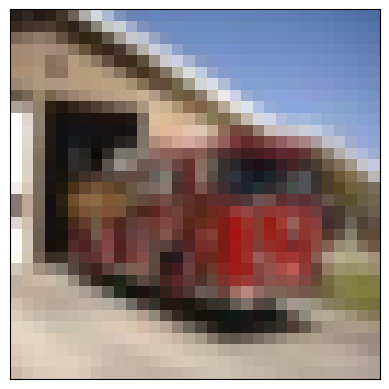

정답: truck 예측 결과: truck


In [ ]:
# 7 훈련한 모델을 사용한 예측

cifar10_loader = DataLoader(cifar10_test, batch_size=1, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)  # 샘플을 1개만 꺼낸다

plt.imshow(images[0].permute(1, 2, 0))  # 채널을 가장 뒤로
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # 라벨과 메모리를 비표시로
plt.show()

net.eval()  # 평가 모드
x, t = images.cuda(), labels.cuda()  # GPU 대응
y = net(x)
print("정답:", cifar10_classes[labels[0]],
      "예측 결과:", cifar10_classes[y.argmax().item()])

In [ ]:
# CNNㅔ 필요한 합성곱층 및 풀링층은 PyTorch의 nn 모듈을 사용해 간단하게 모델에 도입할 수 있다.
# 데이터 확장 및 드롭아웃 도입에 의해 범화성능을 개선할 수 있다.
